In [1]:
plot(arange(5))

NameError: name 'plot' is not defined

In [3]:
plot(arange(5))

NameError: name 'plot' is not defined

In [5]:
import matplotlib
plot(arange(5))

NameError: name 'plot' is not defined

In [6]:
5+3


8

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 29 14:52:22 2016

@author: priyansh
"""

import pandas as pd
import quandl, math, datetime, time
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use('ggplot')

df = quandl.get("WIKI/GOOGL")
#print(df.head())

df = df[['Adj. Open','Adj. Low','Adj. High','Adj. Close','Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_Change'] = (df['Adj. Open'] - df['Adj. Close']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close','HL_PCT','PCT_Change','Adj. Volume']]

#print(df.head())

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)


#print(df.head())

X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)

X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace = True)
#y = np.array(df['label'])
y = np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,test_size = 0.2)

#After training once with these code lines (52 - 55) we can comment them
#clf = LinearRegression()
#clf.fit(X_train, y_train)
#with open('linearregression.pickle','wb') as f:
#    pickle.dump(clf, f)
    
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)


accuracy = clf.score(X_test,y_test)
#print(accuracy)



forecast_set = clf.predict(X_lately)
print(forecast_set,accuracy,forecast_out)

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = time.mktime(last_date.timetuple()) #valid for python 2.7
#last_unix = last_date.timestamp()    #it is valid only in python 3
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
print(df.tail())
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

ImportError: No module named 'quandl'

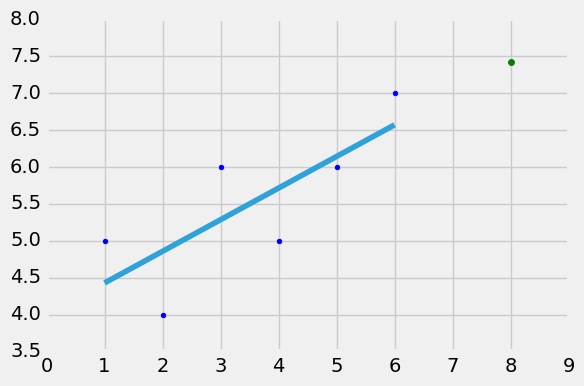

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Sat Dec 31 13:25:46 2016

@author: priyansh
"""

import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys) :
    m =( ((mean(xs) * mean(ys)) - mean(xs*ys)) /
    ( (mean(xs)*mean(xs)) - mean(xs**2)))
    
    b = mean(ys) - m*mean(xs)
    return m,b
    
m,b = best_fit_slope_and_intercept(xs,ys)

regression_line = [(m*x)+b for x in xs]

predict_x = 8
predict_y = (m*predict_x)+b

#print(m,b)
plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y, color='g')
plt.plot(xs, regression_line)
plt.show()

In [10]:
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv("Home/Desktop/shell/ML_new/Loan_prediction/train.csv")

OSError: File b'Home/Desktop/shell/ML_new/Loan_prediction/train.csv' does not exist

/home/priyansh/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Frequency Table for Credit history:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

 Probablity of getting loan for each class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


TypeError: unorderable types: str() > float()

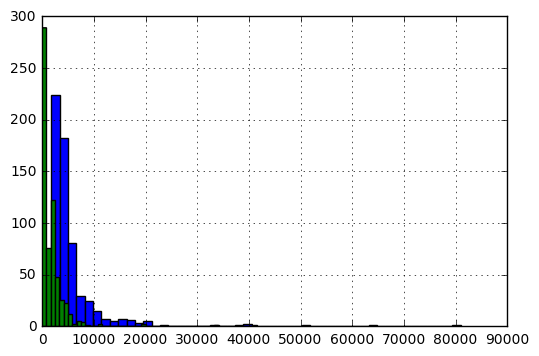

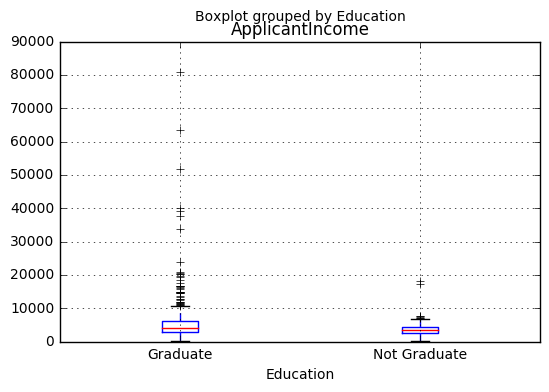

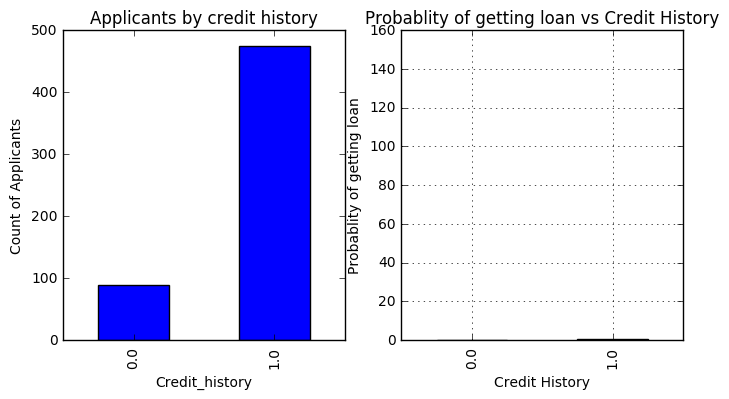

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

df = pd.read_csv("~/Desktop/shell/ML_new/Loan_prediction/train.csv")
df.head(10)
df.describe()
df['Property_Area'].value_counts()
df['Gender'].value_counts()
df['ApplicantIncome'].hist(bins=50)
df['CoapplicantIncome'].hist(bins=50)
#df.boxplot(column='ApplicantIncome')
df.boxplot('ApplicantIncome', by ='Education')

temp1 = df['Credit_History'].value_counts(ascending = True) ##Ascending just arrange it in ascending order
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit history:')
print (temp1)

print ('\n Probablity of getting loan for each class:')
print (temp2)

##To plot the results
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_history')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by credit history")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Credit History')
ax2.set_ylabel('Probablity of getting loan')
ax2.set_title('Probablity of getting loan vs Credit History')
#plt.show()

df.apply(lambda x: sum(x.isnull()),axis=0)

df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Self_Employed'].fillna('No',inplace=True)

table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)


def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]


#df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)
#Since missing values are already fixed in above lines ,so this line is unnecessary

df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)
#print('The code is working fine')


#now we will do some work
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = preprocessing.LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes()
print('The code is working fine')

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrices

def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
    
    #predicting the outcome
    model.predict(data[predictors])
    
    #print accuracy
    accuracy = metrices.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

print('Code is fine')
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)
    



In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,5.587249,9613.0,9.170872
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,4.553877,3849.0,8.255569
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5.062595,5540.0,8.619750
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5.123964,5532.0,8.618305
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,5.855072,23809.0,10.077819


In [ ]:
#this cell is just for some notes
## aggfunc=lambda x:x.map({'Y':1,'N':0}).mean()
## 'aggfunc' gives new column with function applied in it
## 'lambda' function is just simply a function without a name
## 'lambda x' apply lambda function on parameter x
## 'aggfunc=lambda x:x.map({'Y':1,'N':0}).mean()' gives what to do with lambda function